# Group 2 Project - Dognition
this notebook is for exploring dogniton data
#    II. How do the features of the owners correlate to the number of tests completed?
#        2.3) Dog history, such as dog ownership, interest in breeding, # of dogs owned now or in a lifetime, etc …

In [47]:
#set up of requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import os
import openpyxl

In [48]:
#establish connection to data
dognitiondf = pd.read_excel("dognition_data_aggregated_by_dogid.xlsx")
data = dognitiondf
display(dognitiondf)

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,fdc235e0-7144-11e5-ba71-058fbc01cf0b,7,0.009408,13.547222,0.004786,6.891667,0.056447,81.283333,ce9b2aba-7144-11e5-ba71-058fbc01cf0b,male,...,10.0,0.0,NaN,NaN,NaN,NaN,0,0,2015-10-12 14:44:00,1
17982,fdc23a68-7144-11e5-ba71-058fbc01cf0b,1,NaN,NaN,NaN,NaN,0.000000,0.000000,ce9b2eb6-7144-11e5-ba71-058fbc01cf0b,male,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 20:43:00,4
17983,fdc23ba8-7144-11e5-ba71-058fbc01cf0b,20,0.004957,7.137719,0.004201,6.050000,0.094178,135.616667,ce9b306e-7144-11e5-ba71-058fbc01cf0b,female,...,10.0,1.0,Carolina Beach,NC,28428,US,0,0,2015-10-12 20:13:00,1
17984,fdc23e96-7144-11e5-ba71-058fbc01cf0b,4,0.002948,4.244444,0.002778,4.000000,0.008843,12.733333,ce9b33b6-7144-11e5-ba71-058fbc01cf0b,female,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 19:17:00,4


In [28]:
dognitiondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Dog ID                                           17986 non-null  object 
 1   Total Tests Completed                            17986 non-null  int64  
 2   Mean ITI (days)                                  16718 non-null  float64
 3   Mean ITI (minutes)                               16718 non-null  float64
 4   Median ITI (days)                                16718 non-null  float64
 5   Median ITI (minutes)                             16718 non-null  float64
 6   Time diff between first and last game (days)     17986 non-null  float64
 7   Time diff between first and last game (minutes)  17986 non-null  float64
 8   User ID                                          17985 non-null  object 
 9   Gender                      

In [34]:
#checking missing values
missing_values = dognitiondf.isnull().sum()
missing_percent = (dognitiondf.isnull().sum()/len(dognitiondf))*100
print(pd.concat([missing_values, missing_percent], axis = 1, 
                keys = ['Missing Values', 'Percentage']))

                                                 Missing Values  Percentage
Dog ID                                                        0    0.000000
Total Tests Completed                                         0    0.000000
Mean ITI (days)                                            1268    7.049928
Mean ITI (minutes)                                         1268    7.049928
Median ITI (days)                                          1268    7.049928
Median ITI (minutes)                                       1268    7.049928
Time diff between first and last game (days)                  0    0.000000
Time diff between first and last game (minutes)               0    0.000000
User ID                                                       1    0.005560
Gender                                                        1    0.005560
Birthday                                                      1    0.005560
Breed                                                        16    0.088958
Breed_Type  

In [66]:
#Replace missing values
maxdogs_mean = dognitiondf["Max_Dogs"].mean()
print(maxdogs_mean)
dognittiondf = dognitiondf["Max_Dogs"].fillna(maxdogs_mean)


1.2734500973033083


In [69]:
breed_mode = dognitiondf["Breed"].mode()
print(breed_mode)
dognittiondf = dognitiondf["Breed"].fillna(breed_mode)


0    Mixed
Name: Breed, dtype: object


In [38]:
#2.3 Dog history: 
# dog ownership (breed to max dogs)
# interest in breeding (breed to breed type) 
# # of dogs owned now or in a lifetime(user id by max dogs)
#, etc …

In [68]:
most_frequent_breed = dognitiondf[Max_Dogs, Breed]

KeyError: (9, 9)

In [40]:
#dog ownership (maximum dogs by breed)
for Breed in range(1,10):
    for Max_Dogs in range(1,10):
        print(f'{Max_Dogs}*{Breed}={Max_Dogs*Breed:2d}', end=' ') 
    print() # This line belongs to the first loop
    
mostownedbreed = dognitiondf[["Max_Dogs", "Breed"]]
ownedbybreed = owned_breed.groupby(['Breed']).get_group('Labrador Retriever','Shetland Sheepdog',)
print(testsperbreed)

1*1= 1 2*1= 2 3*1= 3 4*1= 4 5*1= 5 6*1= 6 7*1= 7 8*1= 8 9*1= 9 
1*2= 2 2*2= 4 3*2= 6 4*2= 8 5*2=10 6*2=12 7*2=14 8*2=16 9*2=18 
1*3= 3 2*3= 6 3*3= 9 4*3=12 5*3=15 6*3=18 7*3=21 8*3=24 9*3=27 
1*4= 4 2*4= 8 3*4=12 4*4=16 5*4=20 6*4=24 7*4=28 8*4=32 9*4=36 
1*5= 5 2*5=10 3*5=15 4*5=20 5*5=25 6*5=30 7*5=35 8*5=40 9*5=45 
1*6= 6 2*6=12 3*6=18 4*6=24 5*6=30 6*6=36 7*6=42 8*6=48 9*6=54 
1*7= 7 2*7=14 3*7=21 4*7=28 5*7=35 6*7=42 7*7=49 8*7=56 9*7=63 
1*8= 8 2*8=16 3*8=24 4*8=32 5*8=40 6*8=48 7*8=56 8*8=64 9*8=72 
1*9= 9 2*9=18 3*9=27 4*9=36 5*9=45 6*9=54 7*9=63 8*9=72 9*9=81 


NameError: name 'owned_breed' is not defined

In [41]:
max_dog_breed= dognitondf.groupby('Max_Dogs')['Breed'].sum()
print(max_dog_breed)

NameError: name 'dognitondf' is not defined

In [42]:
dognitiondf = dognitiondf[~dogdf['Breed'].isin([0, 'Mixed'])]
dognitiondf['Breed'] = dognitiondf['Breed'].str.replace(r'Mix', 'mix', regex=True, case=False)
totaltests_eachbreed = dogntiondf.groupby('Breed')['Total Tests Completed'].sum()
print(totaltests_eachbreed)

/var/folders/xf/scjk1d6504zdn2z0bcqdh6k80000gp/T/ipykernel_1382/482909973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dognitiondf['Breed'] = dognitiondf['Breed'].str.replace(r'Mix', 'mix', regex=True, case=False)


NameError: name 'dogntiondf' is not defined

In [43]:
totaltests_eachbreed.plot(x = 'Breed', y = 'Total Tests Completed', kind = 'bar')

NameError: name 'totaltests_eachbreed' is not defined

In [44]:
Total_Tests_Completed_series = dognitiondf['Total Tests Completed']
type(Total_Tests_Completed_series)

pandas.core.series.Series

<Axes: xlabel='Total Tests Completed', ylabel='Breed'>

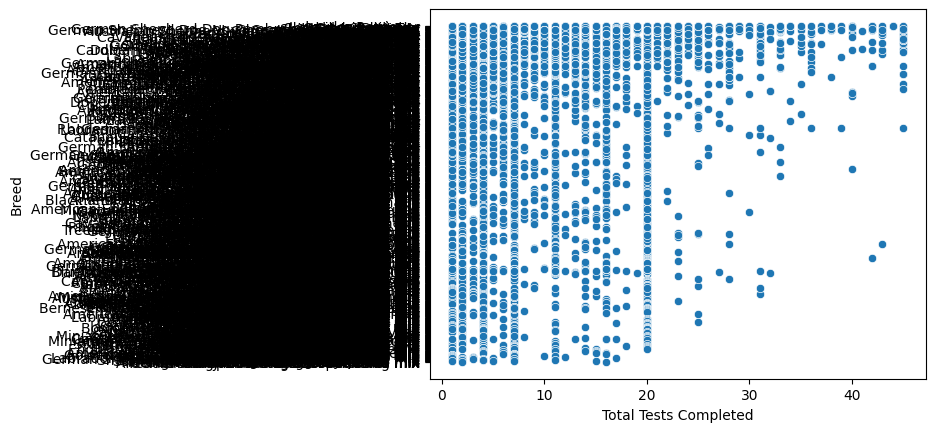

In [45]:
sns.scatterplot(data = dognitiondf, x = 'Total Tests Completed', y = 'Breed')

In [46]:
# of dogs owned now or in a lifetime(user id by max dogs) number of users with dogs
sns.scatterplot(data = dogntiondf, x = 'User ID', y = 'Max_Dogs')

NameError: name 'dogntiondf' is not defined

In [ ]:
most_frequent_breed = dognitiondf["Breed"].mode()
uniquebreeds = dognitiondf["Breed"].unique()
breedcounts = dognitiondf["Breed"].valuecounts(1-20)